<a href="https://colab.research.google.com/github/graciehou9/HHS-Dataset/blob/main/HHS_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Steps
1. Graph mean, median, min/max for all columns
2. Look how trends differ, write results into google sheets
3. Possibly restructure (add more cols) in table to make more readable for each column I'm analyzing
4. update agenda
5. clean up how i structured new code (make more descriptive)
6. DESCRIBE data values and why they're important!

#Downloading Data
- Reading the file contents and only selecting MI entries

In [ ]:
import pandas as pd

file_path = "/content/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility_20250210.csv"

#selected columns
col1 = "inpatient_beds_used_7_day_coverage"
col2 = "all_adult_hospital_inpatient_bed_occupied_7_day_coverage"
col3 = "all_pediatric_inpatient_bed_occupied_7_day_coverage"
col4 = "total_icu_beds_7_day_coverage"
col5 = "inpatient_beds_used_covid_7_day_coverage"
col6 = "total_pediatric_patients_hospitalized_confirmed_covid_7_day_coverage"
col7 = "total_adult_patients_hospitalized_confirmed_covid_7_day_coverage"
col8 = "total_patients_hospitalized_confirmed_influenza_7_day_coverage"
###
col9 = "previous_day_admission_pediatric_covid_confirmed_0_4_7_day_sum"
col10 = "previous_day_admission_pediatric_covid_confirmed_5_11_7_day_sum"
col11 = "previous_day_admission_pediatric_covid_confirmed_12_17_7_day_sum"
col12 = "previous_day_admission_pediatric_covid_confirmed_7_day_coverage"

col13 = "previous_day_admission_adult_covid_confirmed_18-19_7_day_sum"
col14 = "previous_day_admission_adult_covid_confirmed_20-29_7_day_sum"
col15 = "previous_day_admission_adult_covid_confirmed_30-39_7_day_sum"
col16 = "previous_day_admission_adult_covid_confirmed_40-49_7_day_sum"
col17 = "previous_day_admission_adult_covid_confirmed_50-59_7_day_sum"
col18 = "previous_day_admission_adult_covid_confirmed_60-69_7_day_sum"
col19 = "previous_day_admission_adult_covid_confirmed_70-79_7_day_sum"
col20 = "previous_day_admission_adult_covid_confirmed_80+_7_day_sum"

usecols = ["state", col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13, col14, col15, col16, col17, col18, col19, col20]
df = pd.read_csv(file_path, usecols = usecols)

#Statistics

Definitions
- Average: takes the average over all of the selected column entries for hospitals in each state
- Median: takes the median from all of the selected column entries by state


(For me to think about: What does looking at the averages of the coverage for these values show for the trends of each state?)

In [ ]:
#aggregate averages, medians, mins, maxs of each state
numeric_cols = [col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13, col14, col15, col16, col17, col18, col19, col20]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

state_averages = df.groupby("state").mean()
state_medians = df.groupby("state").median()
state_mins = df.groupby("state").min()
state_maxs = df.groupby("state").max()

state_averages.describe()

,inpatient_beds_used_7_day_coverage,all_adult_hospital_inpatient_bed_occupied_7_day_coverage,inpatient_beds_used_covid_7_day_coverage,total_adult_patients_hospitalized_confirmed_covid_7_day_coverage,total_pediatric_patients_hospitalized_confirmed_covid_7_day_coverage,total_icu_beds_7_day_coverage,total_patients_hospitalized_confirmed_influenza_7_day_coverage,previous_day_admission_adult_covid_confirmed_18-19_7_day_sum,previous_day_admission_adult_covid_confirmed_20-29_7_day_sum,previous_day_admission_adult_covid_confirmed_30-39_7_day_sum,previous_day_admission_adult_covid_confirmed_40-49_7_day_sum,previous_day_admission_adult_covid_confirmed_50-59_7_day_sum,previous_day_admission_adult_covid_confirmed_60-69_7_day_sum,previous_day_admission_adult_covid_confirmed_70-79_7_day_sum,previous_day_admission_adult_covid_confirmed_80+_7_day_sum,previous_day_admission_pediatric_covid_confirmed_7_day_coverage,all_pediatric_inpatient_bed_occupied_7_day_coverage,previous_day_admission_pediatric_covid_confirmed_0_4_7_day_sum,previous_day_admission_pediatric_covid_confirmed_12_17_7_day_sum,previous_day_admission_pediatric_covid_confirmed_5_11_7_day_sum
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,6.713727,6.411415,5.930073,6.458724,6.428741,6.808019,5.863757,0.003839,0.157600,0.289839,0.383559,0.797650,1.203841,1.296201,1.270853,6.390772,5.516679,0.068416,0.017920,0.021487
std,0.156663,0.188722,0.438359,0.127349,0.125025,0.110249,0.308172,0.007390,0.131383,0.264143,0.396011,0.763417,0.960127,0.955472,1.066632,0.178347,0.864637,0.102669,0.041659,0.071885
min,6.061947,5.309735,4.692857,6.000000,6.000000,6.309735,5.006588,0.000000,0.000000,0.000000,0.000000,0.000000,0.064327,0.049383,0.090000,5.415929,3.774237,0.000000,0.000000,0.000000
25%,6.640646,6.378430,5.641658,6.411372,6.380822,6.764522,5.817156,0.000376,0.052510,0.101953,0.127745,0.263584,0.495060,0.558269,0.454992,6.364499,4.924371,0.010718,0.001218,0.000800
50%,6.737668,6.439003,5.851595,6.469640,6.443690,6.838580,5.938194,0.002326,0.113475,0.203037,0.285980,0.682169,0.996139,1.035272,0.907193,6.419080,5.725763,0.035733,0.003975,0.004568
75%,6.814049,6.479244,6.164680,6.515931,6.487295,6.872072,6.026513,0.003815,0.266055,0.417178,0.465324,1.065248,1.670929,1.838006,1.794550,6.460499,6.321514,0.085546,0.015619,0.014451
max,6.978571,6.978571,6.838312,6.978571,6.978571,6.978571,6.971429,0.052470,0.506024,1.138158,2.349153,4.414179,5.102362,3.742061,4.347472,6.978571,6.792857,0.555871,0.266615,0.526151


#Plotting


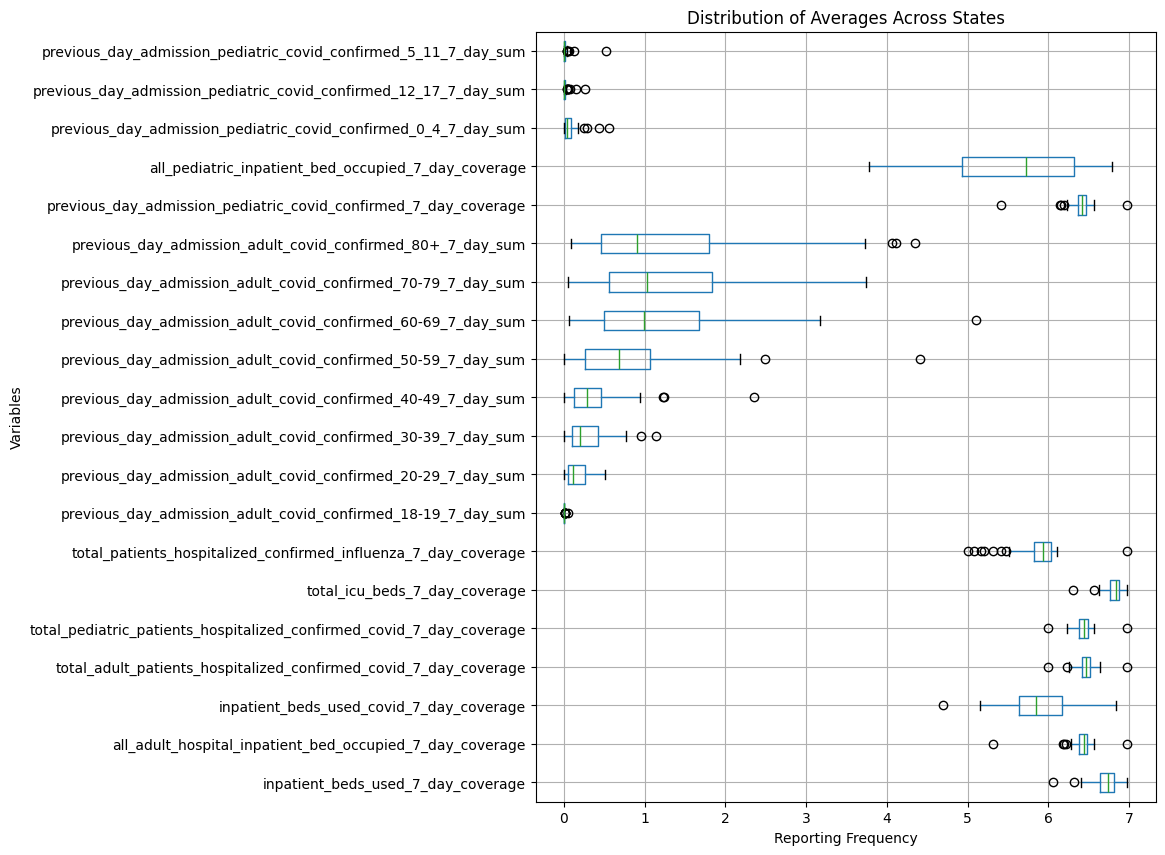

In [ ]:
#box plot
#open circles on graph represent outliers
import matplotlib.pyplot as plt

cols = state_averages.columns[:20]

plt.figure(figsize=(8, 10))
state_averages[cols].boxplot(vert=False)
plt.title('Distribution of Averages Across States')
plt.xlabel('Reporting Frequency')
plt.ylabel('Variables')
plt.grid(True)

plt.show()

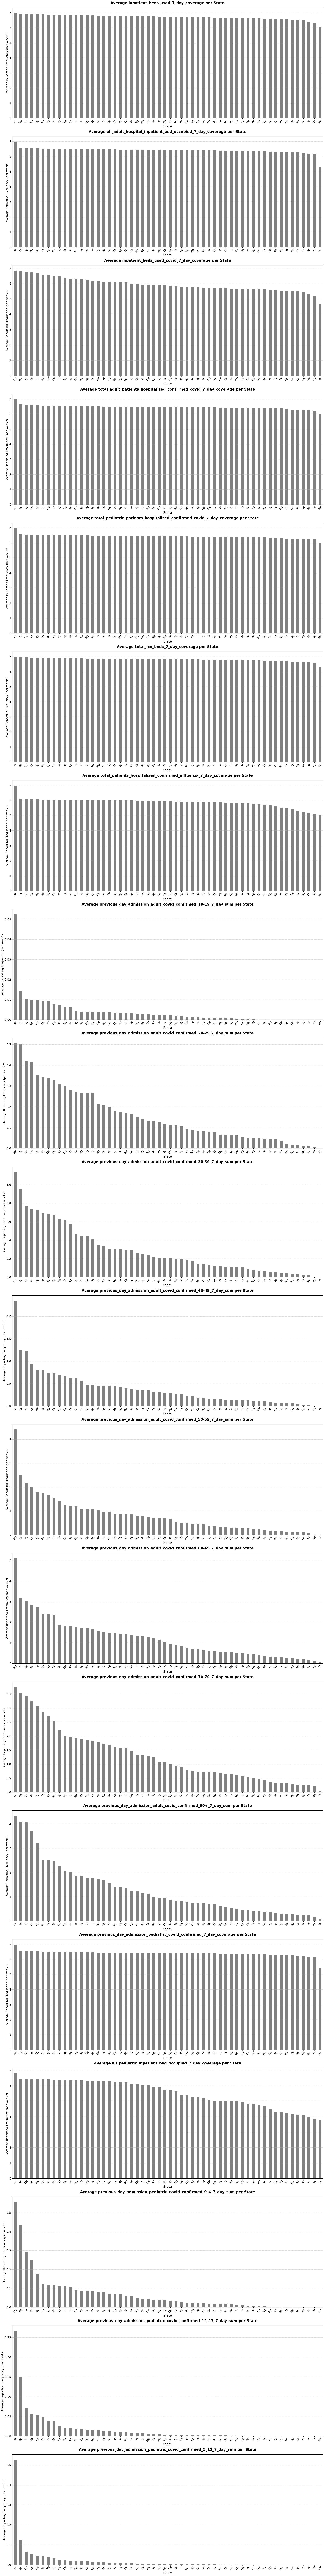

In [ ]:
#bar graph representation
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

cols = state_averages.columns[:20]
fig, axes = plt.subplots(len(cols), 1, figsize=(25, 10 * len(cols)))
axes = axes.flatten()

for i, col in enumerate(cols):
    state_averages[col].sort_values(ascending=False).plot(
        kind='bar', ax=axes[i], color='gray'
    )

    axes[i].set_title(f'Average {col} per State', fontsize=20, fontweight='bold', pad=20)
    axes[i].set_ylabel('Average Reporting Frequency (per week?)', fontsize=16)
    axes[i].set_xlabel('State', fontsize=18)

    axes[i].tick_params(axis='x', rotation=45, labelsize=14)
    axes[i].tick_params(axis='y', labelsize=16)
    axes[i].xaxis.set_major_locator(MaxNLocator(nbins=len(state_averages)))  # Show all states

    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

plt.subplots_adjust(hspace=0.6, wspace=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

#check std?

#Extraneous

In [ ]:
#Entries (gave mixed column type warning in vscode)
num_entries = df_mi.shape[0]
print(f"Number of entries for Michigan: {num_entries}")

#Median
numeric_medians = df_mi.select_dtypes(include=['number']).median()
print("\nMedian values for numerical columns:\n", numeric_medians)

#Summary Stats
summary_stats = df_mi.describe()
print("\nSummary statistics:\n", summary_stats)


Summary statistics:
                 zip     fips_code  total_beds_7_day_coverage  \
count  29691.000000  29691.000000               29691.000000   
mean   48847.005153  26099.980364                   6.537166   
std      607.820124     49.922521                   1.479827   
min    48033.000000  26003.000000                   0.000000   
25%    48235.000000  26059.000000                   7.000000   
50%    48811.000000  26105.000000                   7.000000   
75%    49417.000000  26147.000000                   7.000000   
max    49953.000000  26165.000000                   7.000000   

       all_adult_hospital_beds_7_day_coverage  \
count                            29691.000000   
mean                                 6.156815   
std                                  2.133344   
min                                  0.000000   
25%                                  7.000000   
50%                                  7.000000   
75%                                  7.000000   
max      